In [1]:
# 171805012 Refiye Şehnaz Yıldırım
# 171805043 Ersu Karpuz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ersu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Upload Data
data = pd.read_excel("NLP1_train_tweets.xlsx",header=None)

data.columns = ['Sentence','Class']
data

,Sentence,Class
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz
...,...,...
13827,@Buragl111 turkcell kazık takıl sen bimcell le...,olumsuz
13828,@Turkcell merhaba turkcell.20 senelik dostlugu...,olumlu
13829,@TurkcellHizmet merhaba. Numarami bir baska op...,olumsuz
13830,iyi de Herkes TURKCELL Abonesi Değil ki ??,olumlu


In [4]:
data.head()

,Sentence,Class
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz


In [5]:
data.shape

(13832, 2)

In [6]:
data['Sentence'] = data['Sentence'].str.strip().str.lower()

In [7]:
data["Class"].unique()

array(['olumsuz', 'olumlu'], dtype=object)

<BarContainer object of 2 artists>

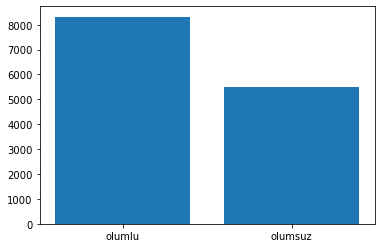

In [8]:
plt.bar(data["Class"].value_counts().keys(), data["Class"].value_counts().values)

# Laplacian Smoothing


In [9]:
bow_dict = {
    'olumlu': [],
    'olumsuz': []
}

In [10]:
for i, sentence in enumerate(data["Sentence"]):
    bow_dict[data["Class"][i]].extend(sentence.split())
    

In [11]:
bow = " ".join(sentence for sentence in data["Sentence"]).split()
sentence_lap = []
for word in bow:
    if word not in sentence_lap:
        sentence_lap.append(word)

In [12]:
def prior(Class):
    return data["Class"].value_counts()[Class]/len(data["Class"])

In [13]:
def laplacian(w, a):
    num = 0
    for word in a:
        if w == word:
            num += 1
    return num

In [14]:
def like_sentence(w, Class):
    return (laplacian(w, bow_dict[Class])+1)/(len(bow_dict[Class])+len(sentence_lap))

In [15]:
sentence = "bilgisayar bühendisliğini seviyorum"

In [16]:
num = prior("olumlu")
for item in sentence.split():
    if item in sentence_lap:
        num = num * like_sentence(item, "olumlu")
print(num)

6.396676802152773e-09
